In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
cat4 = cv2.imread('E:\\dog_cat\\data\\train\\cats\\cat.3.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [3]:

dog2 = cv2.imread('E:\\dog_cat\\data\\train\\dogs\\dog.3.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [4]:

print(dog2.shape)
print(cat4.shape)

(375, 499, 3)
(414, 500, 3)


In [5]:
import keras 
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [6]:

image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

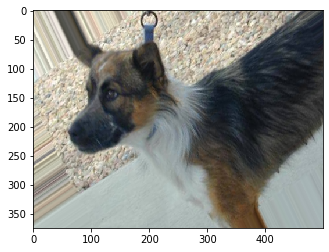

In [7]:
plt.imshow(image_gen.random_transform(dog2))

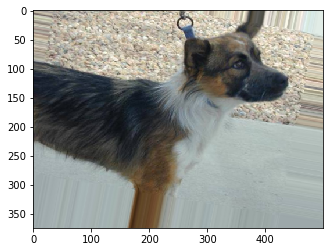

In [8]:
plt.imshow(image_gen.random_transform(dog2))

In [9]:

image_gen.flow_from_directory('E:\\dog_cat\\data\\train')

Found 8005 images belonging to 2 classes.


In [10]:
image_gen.flow_from_directory('E:\\dog_cat\\data\\test')

Found 2023 images belonging to 2 classes.


In [11]:
image_shape = (150,150,3)

In [12]:

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [15]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('E:\\dog_cat\\data\\train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 8005 images belonging to 2 classes.


In [16]:
test_image_gen = image_gen.flow_from_directory('E:\\dog_cat\\data\\test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 2023 images belonging to 2 classes.


In [17]:
train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [18]:

import warnings
warnings.filterwarnings('ignore')

In [19]:

test_image_gen[0]

(array([[[[0.6250889 , 0.47214767, 0.405481  ],
          [0.6422494 , 0.4893082 , 0.42264152],
          [0.6606211 , 0.50767994, 0.44101325],
          ...,
          [0.5483684 , 0.45457637, 0.26568985],
          [0.54539496, 0.45308962, 0.2612296 ],
          [0.54242146, 0.45160288, 0.25676942]],
 
         [[0.614935  , 0.46199375, 0.3953271 ],
          [0.63947284, 0.4865317 , 0.419865  ],
          [0.6509033 , 0.49796215, 0.43129548],
          ...,
          [0.54028034, 0.4496362 , 0.2544539 ],
          [0.53730685, 0.44517598, 0.25296715],
          [0.5343334 , 0.44071573, 0.25148043]],
 
         [[0.59272283, 0.43978167, 0.373115  ],
          [0.6329173 , 0.47997612, 0.41330945],
          [0.64538074, 0.49243957, 0.4257729 ],
          ...,
          [0.50994116, 0.41582355, 0.2298704 ],
          [0.44898486, 0.35486722, 0.17486103],
          [0.38802856, 0.29391092, 0.11985169]],
 
         ...,
 
         [[0.63551706, 0.6745098 , 0.47910017],
          [0.63529

In [20]:

results = model.fit_generator(train_image_gen,epochs=10,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)


Epoch 1/10
150/150 [==============================] - 64s 425ms/step - loss: 0.6977 - accuracy: 0.5075 - val_loss: 0.6976 - val_accuracy: 0.5677
Epoch 2/10
150/150 [==============================] - 65s 434ms/step - loss: 0.6909 - accuracy: 0.5437 - val_loss: 0.6803 - val_accuracy: 0.5521
Epoch 3/10
150/150 [==============================] - 55s 368ms/step - loss: 0.6816 - accuracy: 0.5806 - val_loss: 0.6798 - val_accuracy: 0.5521
Epoch 4/10
150/150 [==============================] - 62s 410ms/step - loss: 0.6806 - accuracy: 0.5783 - val_loss: 0.6119 - val_accuracy: 0.6146
Epoch 5/10
150/150 [==============================] - 64s 426ms/step - loss: 0.6758 - accuracy: 0.5827 - val_loss: 0.6638 - val_accuracy: 0.5521
Epoch 6/10
150/150 [==============================] - 78s 519ms/step - loss: 0.6706 - accuracy: 0.5842 - val_loss: 0.6923 - val_accuracy: 0.5365
Epoch 7/10
150/150 [==============================] - 74s 492ms/step - loss: 0.6733 - accuracy: 0.5779 - val_loss: 0.6601 - val_a

In [21]:
model.save('cat_dog11.h5')

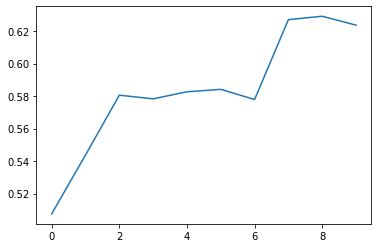

In [22]:

plt.plot(results.history['accuracy'])

In [23]:

model.save('cat_dog_100epoch.h5')

In [24]:

train_image_gen.class_indices

{'cats': 0, 'dogs': 1}

In [25]:
import numpy as np
from keras.preprocessing import image

dog_file = 'E:\\dog_cat\\data\\test\\dogs\\dog.4002.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [26]:
prediction_prob = model.predict(dog_img)

In [27]:
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.45409343]] 
